# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rahman Taufik
- Email: rahmantaufik27@gmail.com
- Id Dicoding: rtaufik_27

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import library
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

#### Data Import

In [2]:
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df = pd.read_csv(dataset)

#### Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#### Data Sample

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


#### Cek Descriptive Statistic

In [5]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Cek Null

In [6]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns

Attrition    412
dtype: int64

#### Cek Duplicate

In [7]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

## Exploratory Data Analysis

#### Cek Distribusi Attrition (EDA UNIVARIATE)

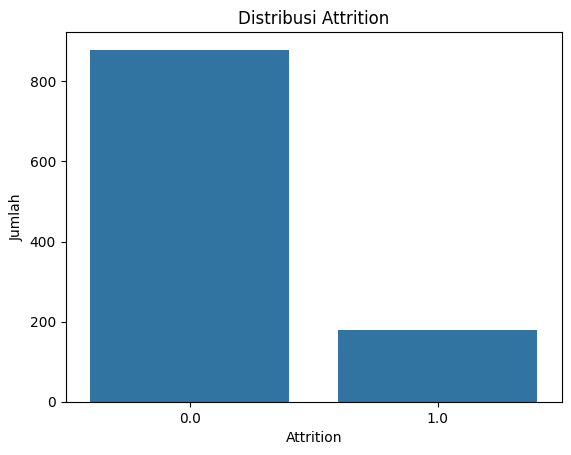

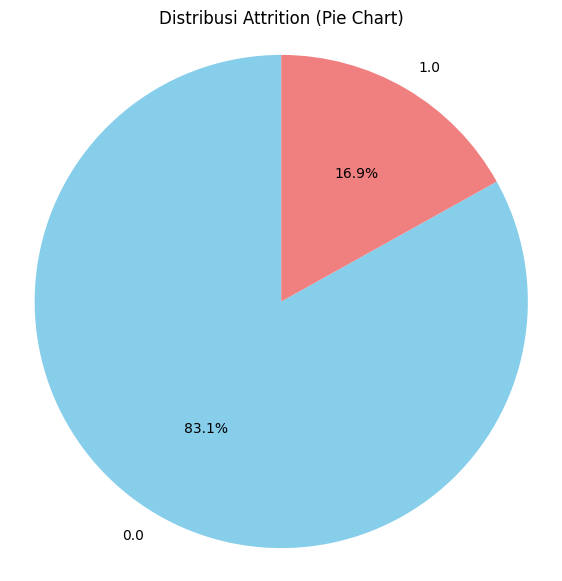

In [8]:
# Visualisasi Distribusi Target
plt.figure()
sns.countplot(data=df, x='Attrition')
plt.title("Distribusi Attrition")
plt.xlabel("Attrition")
plt.ylabel("Jumlah")
plt.show()

# percentages = df['Attrition'].value_counts(normalize=True) * 100
# print("Persentase kelas Attrition")
# print(percentages)

plt.figure(figsize=(7, 7))

attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts,
        labels=attrition_counts.index,
        autopct='%1.1f%%',
        startangle=90,    
        colors=['skyblue', 'lightcoral'])

plt.title("Distribusi Attrition (Pie Chart)")
plt.axis('equal')
plt.show()

#### Cek Tren Atribut terhadap Attrition (EDA MULTIVARIATE NUMERIKAL)

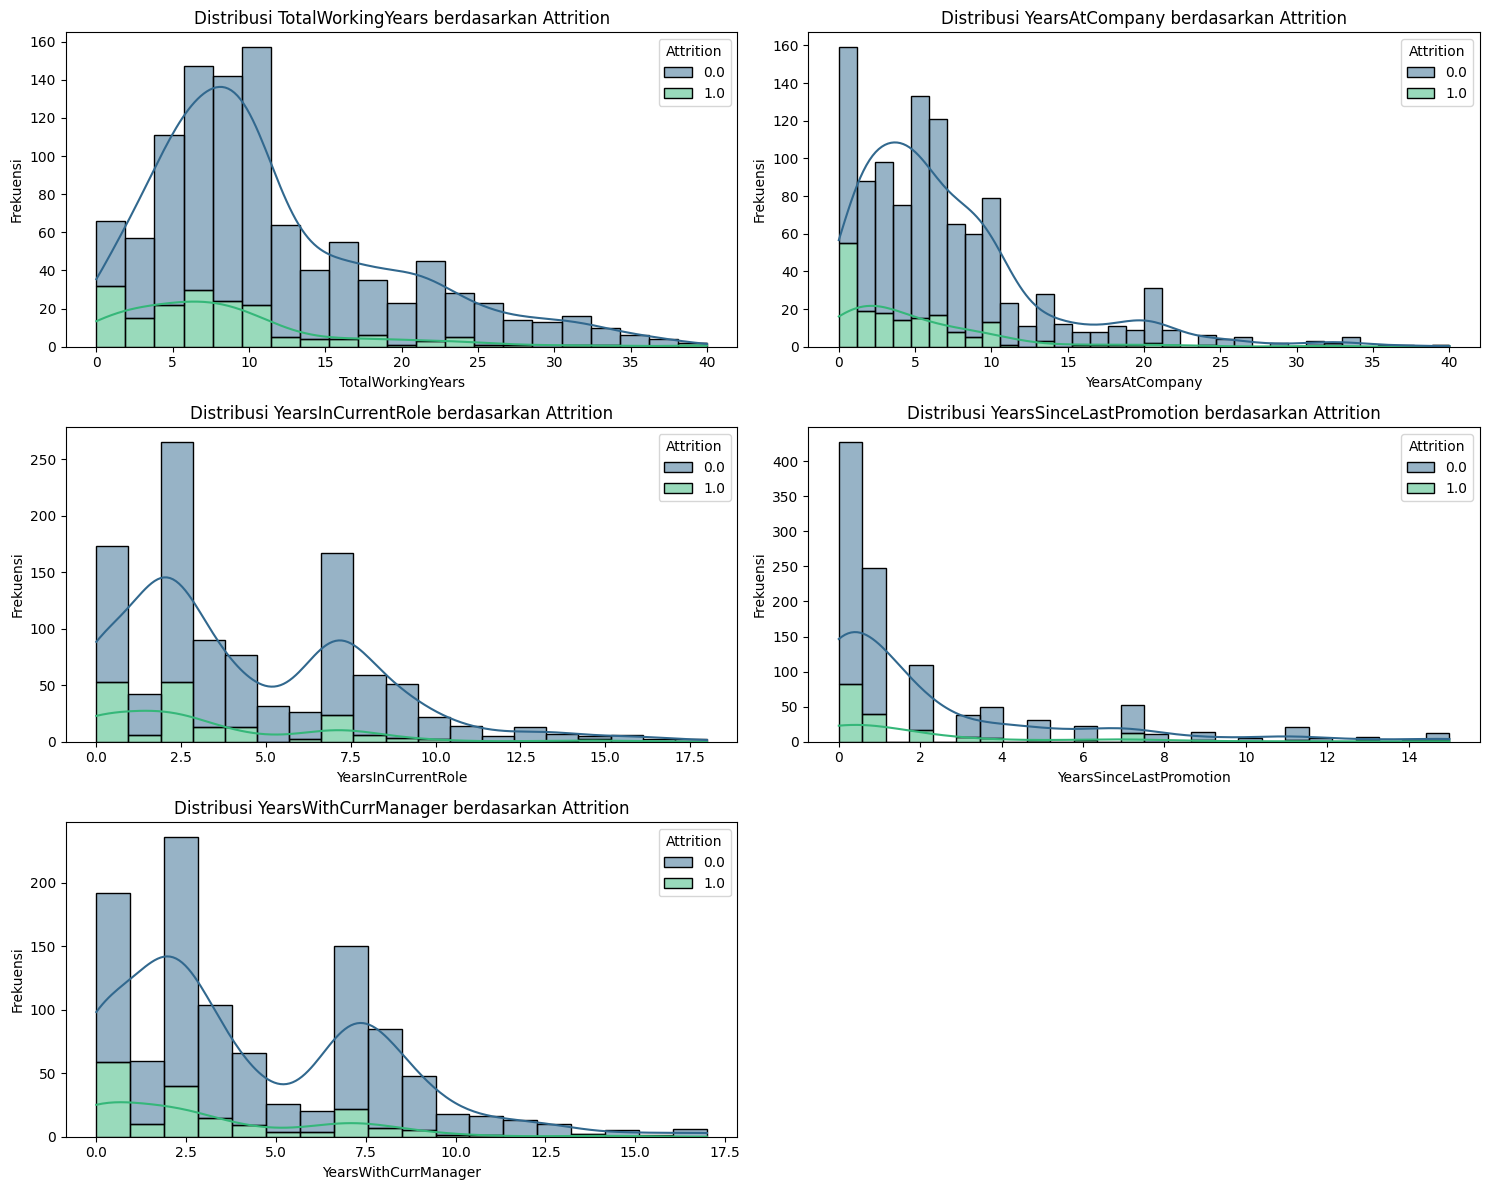

In [9]:
columns_to_plot = [
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1) # Atur grid menjadi 3 baris, 2 kolom
    sns.histplot(data=df, x=col, hue='Attrition', multiple='stack', kde=True, bins='auto', palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan Attrition')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout() # Merapikan layout antar subplot
plt.show()

Terlihat sekilas dari diagram distribusi waktu diatas, semakin pengalaman dikit seorang karyawan semakin rentang untuk terjadinya attrition

#### Cek Korelasi terhadap Attrition  (EDA MULTIVARIATE NUMERIKAL DAN KATEGORIKAL)

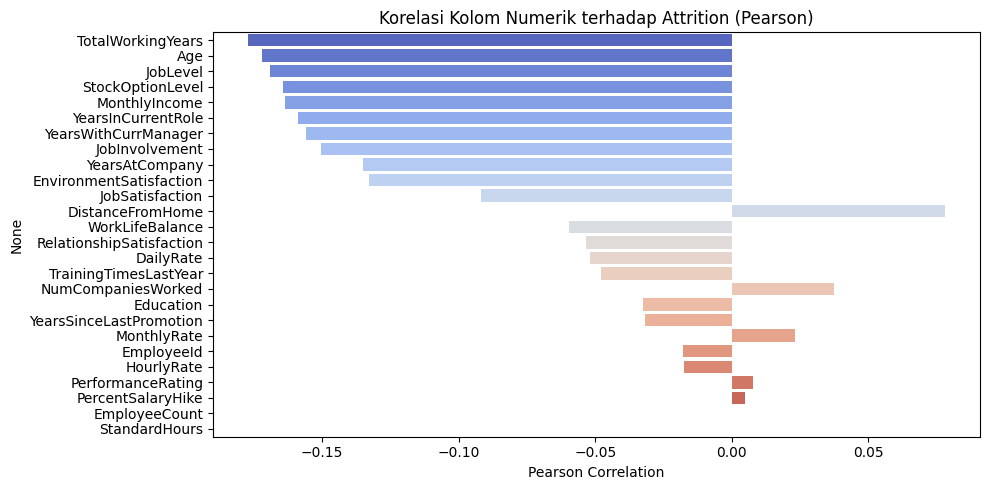

Kolom yang berkorelasi positif dengan Attrition antara lain:
DistanceFromHome      0.078074
NumCompaniesWorked    0.037429
MonthlyRate           0.023299
PerformanceRating     0.007755
PercentSalaryHike     0.004907
dtype: float64


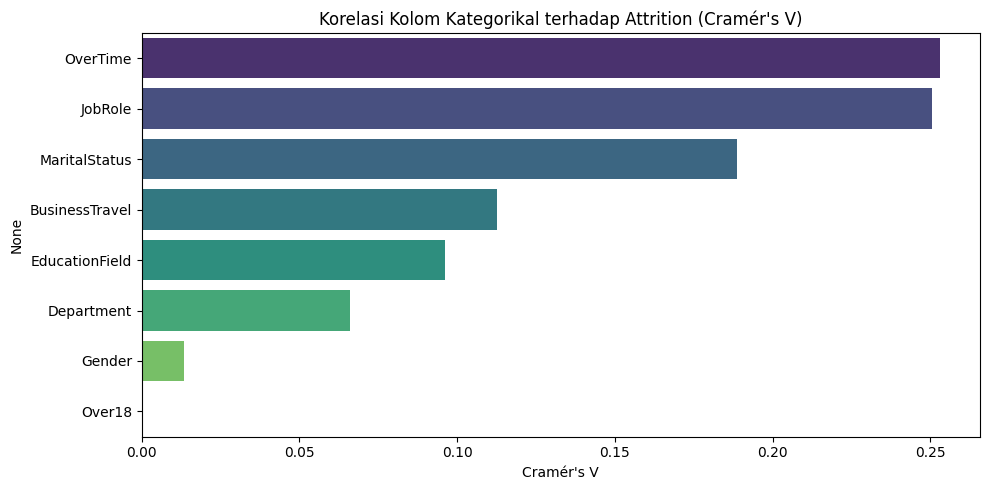

In [10]:
# pisahkan kolom numerik dengan non-numerik
numeric_cols = df.select_dtypes(include='number').columns.tolist()
non_numeric_cols = df.select_dtypes(exclude='number').columns.tolist()

# print("Kolom numerik:")
# print(numeric_cols)
# print("\nKolom non-numerik:")
# print(non_numeric_cols)

# corr_numeric = df[numeric_cols].corrwith(df['Attrition']).sort_values(key=abs, ascending=False)
# corr_numeric.sort_values()
# numeric_columns = df.select_dtypes(include='number').columns.tolist()
# corr_numeric2 = df[numeric_columns].corr()
# corr_numeric2['Attrition'].sort_values()

# hapus attrition di numerik
numeric_cols.remove('Attrition')

# cek korelasi attrition untuk kolom numerik menggunakan Person Correlation
corr_numeric = df[numeric_cols].corrwith(df['Attrition']).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_numeric.values, y=corr_numeric.index, palette='coolwarm')
plt.title('Korelasi Kolom Numerik terhadap Attrition (Pearson)')
plt.xlabel('Pearson Correlation')
plt.tight_layout()
plt.show()

# # cek korelasi attrition untuk kolom numerik menggunakan Spearman Correlation
# corr_numeric_spearman = df[numeric_cols2].corrwith(df['Attrition'], method='spearman').sort_values(key=abs, ascending=False)
# plt.figure()
# sns.barplot(x=corr_numeric_spearman.values, y=corr_numeric_spearman.index, palette='coolwarm')
# plt.title('Korelasi Kolom Numerik terhadap Attrition (Spearman)')
# plt.xlabel('Spearman Correlation')
# plt.tight_layout()
# plt.show()

corr_numeric_pos = corr_numeric[corr_numeric > 0]
print("Kolom yang berkorelasi positif dengan Attrition antara lain:")
print(corr_numeric_pos)

# cek korelasi attrition untuk kolom non-numerik menggunakan Cramer's V
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramer_scores = {}

for col in non_numeric_cols:
    confusion = pd.crosstab(df[col], df['Attrition'])
    cramer_scores[col] = cramers_v(confusion)

cramer_series = pd.Series(cramer_scores).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=cramer_series.values, y=cramer_series.index, palette='viridis')
plt.title("Korelasi Kolom Kategorikal terhadap Attrition (Cramér's V)")
plt.xlabel("Cramér's V")
plt.tight_layout()
plt.show()

Bisa disimpulan kolom/atribut yang berkorelasi positif dengan Attrition antara lain adalah kolom: 
DistanceFromHome, NumCompaniesWorked, MonthlyRate, PerformanceRating, PercentSalaryHike, OverTime, JobRole, MaritalStatus, BusinessTravel, EducationField, Department, Gender

#### Cek Outlier terhadap Attrition  (EDA MULTIVARIATE NUMERIKAL)

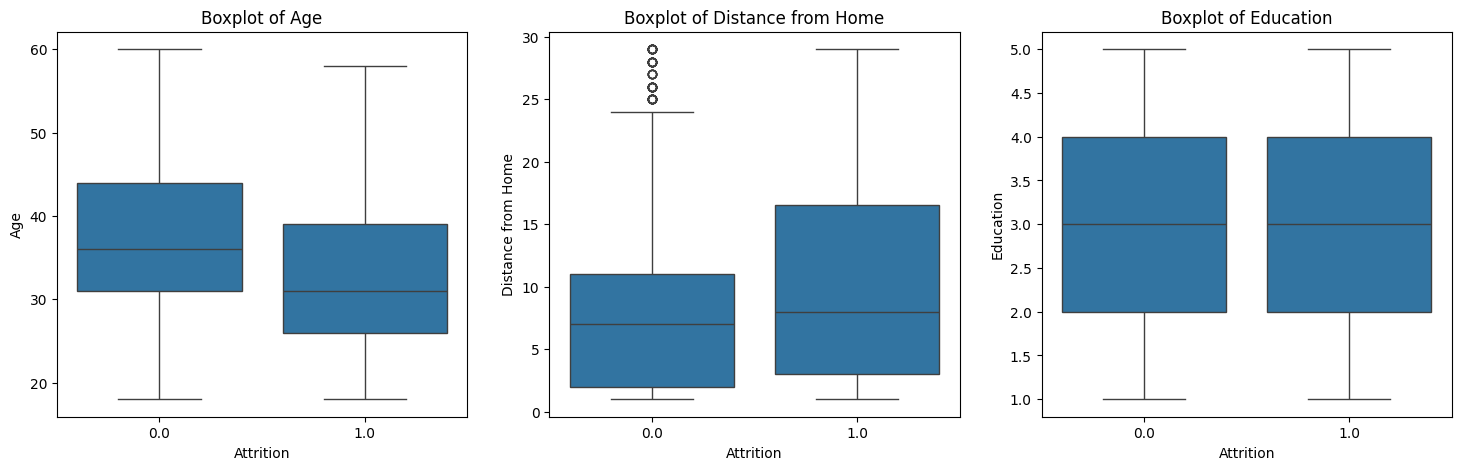

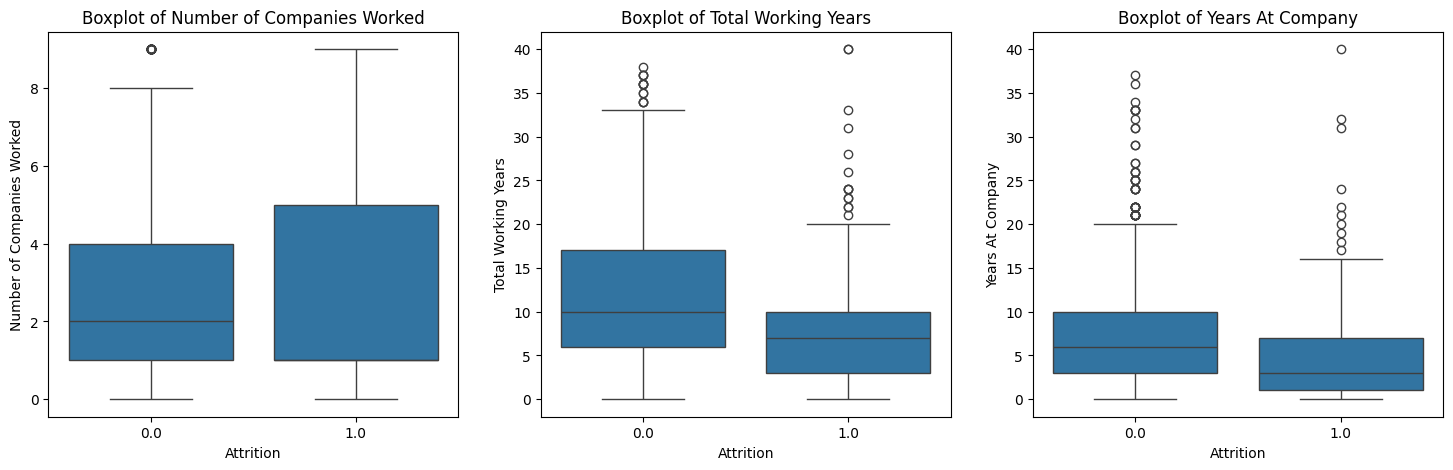

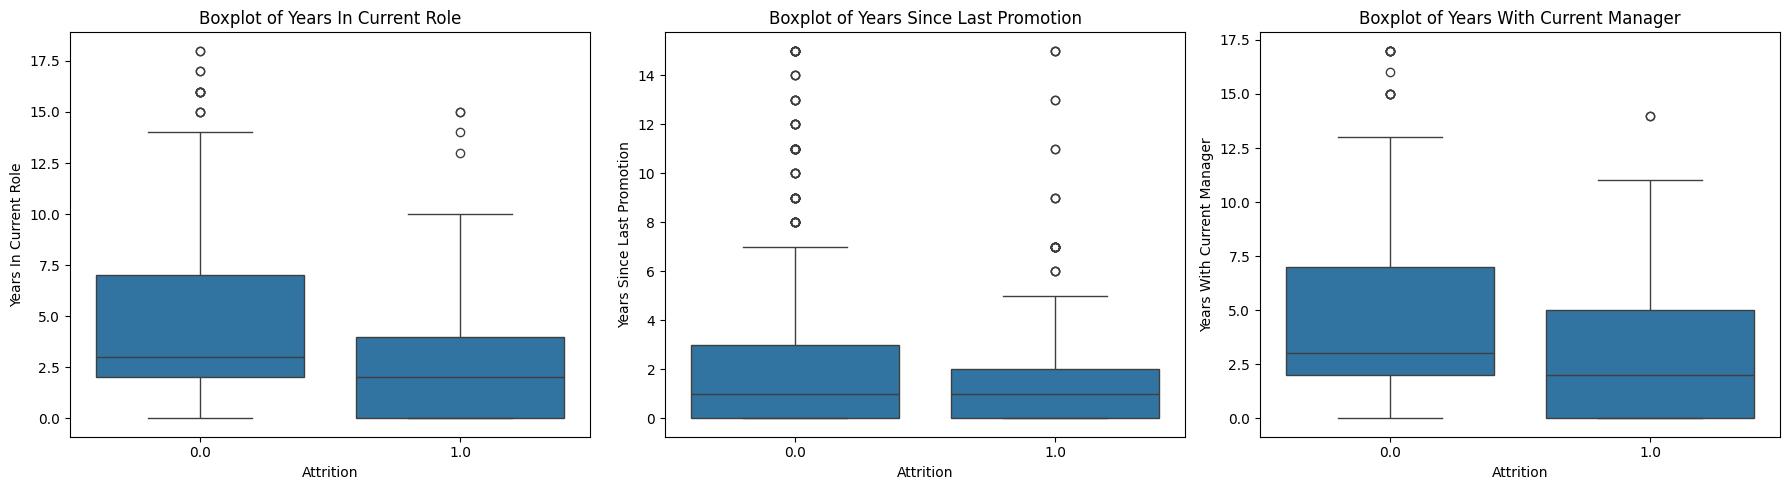

In [11]:
plt.figure(figsize=(18, 5))

# Boxplot untuk 'age'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Attrition'], y=df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Boxplot untuk 'Distance from Home'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Attrition'], y=df['DistanceFromHome'])
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')

# Boxplot untuk 'Education'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Attrition'], y=df['Education'])
plt.title('Boxplot of Education')
plt.ylabel('Education')

plt.figure(figsize=(18, 5))

# Boxplot untuk 'Number of Companies Worked'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Attrition'], y=df['NumCompaniesWorked'])
plt.title('Boxplot of Number of Companies Worked')
plt.ylabel('Number of Companies Worked')

# Total Working Years
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Attrition'], y=df['TotalWorkingYears'])
plt.title('Boxplot of Total Working Years')
plt.ylabel('Total Working Years')

# YearsAtCompany
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Attrition'], y=df['YearsAtCompany'])
plt.title('Boxplot of Years At Company')
plt.ylabel('Years At Company')

plt.figure(figsize=(18, 5))

# YearsInCurrentRole
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Attrition'], y=df['YearsInCurrentRole'])
plt.title('Boxplot of Years In Current Role')
plt.ylabel('Years In Current Role')

# YearsSinceLastPromotion
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Attrition'], y=df['YearsSinceLastPromotion'])
plt.title('Boxplot of Years Since Last Promotion')
plt.ylabel('Years Since Last Promotion')

# YearsWithCurrManager
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Attrition'], y=df['YearsWithCurrManager'])
plt.title('Boxplot of Years With Current Manager')
plt.ylabel('Years With Current Manager')

plt.tight_layout()
plt.show()

Berdasarkan diagram boxplot, terlihata data outlier terhadap Attrition antara lain 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager'

#### Cek Korelasi Monthly Income dan Total Working Years Berdasarkan Attrition (EDA MULTIVARIATE NUMERIKAL)

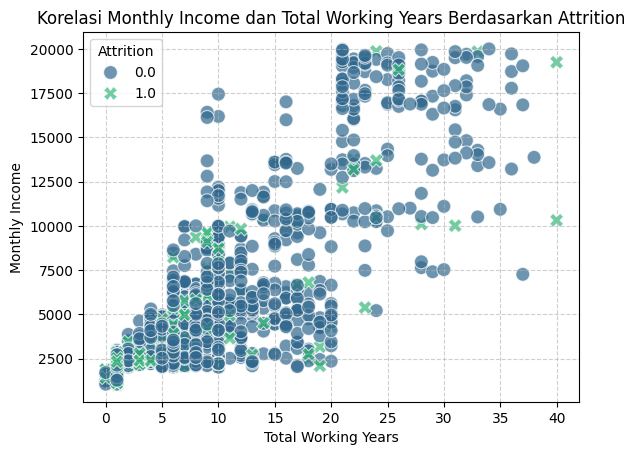

In [12]:
sns.scatterplot(
    data=df,
    x='TotalWorkingYears',
    y='MonthlyIncome',
    hue='Attrition',  # Mewarnai titik berdasarkan Attrition
    style='Attrition', # Memberikan bentuk marker berbeda berdasarkan Attrition
    s=100,            # Ukuran marker
    alpha=0.7,        # Transparansi marker
    palette='viridis' # Skema warna
)

plt.title('Korelasi Monthly Income dan Total Working Years Berdasarkan Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.grid(True, linestyle='--', alpha=0.6) # Menambahkan grid untuk keterbacaan
plt.legend(title='Attrition') # Menambahkan legenda
plt.show()

## Data Preparation / Preprocessing

#### Data missing handling
- Berhubung data missing / null dimiliki oleh kolom attrition (target kelas) yaitu 412 dari 1470 data, maka solusi yang digunakan sementara adalah memisahkan data missing tersebut menjadi dataset lain (anggap nantinya bisa digunakan untuk inferensi hasil dari pemodelan)

In [13]:
# dataframe with null attrition
df_missing_attrition = df[df['Attrition'].isna()]
# dataframe not null
df_nn = df[~df['Attrition'].isna()]
df_nn.info()
null_counts = df_nn.isnull().sum()
print("Missing values of column:", len(null_counts[null_counts > 0]))

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

#### Scaling Features
- Berhubung rentang nilai antar datanya jauh (bisa dilihat di descriptive statistic), maka dilakukan fitur scaling menggunakan minmaxscaller

In [14]:
print("sebelum di scaling")
df_nn.head()

sebelum di scaling


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


In [15]:
scaler = MinMaxScaler()
numeric_but_not = ['Attrition', 'EmployeeId', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'WorkLifeBalance']
numeric_columns = df_nn.select_dtypes(include='number').drop(columns=numeric_but_not).columns
# df_missing_attrition[numeric_columns] = scaler.fit_transform(df_missing_attrition[numeric_columns])
df_nn[numeric_columns] = scaler.fit_transform(df_nn[numeric_columns])
# sesudah di scaling
df_nn.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,0.452381,1.0,Travel_Rarely,0.743737,Research & Development,0.357143,2,Medical,1,...,1,80,0,0.375,0.333333,1,0.025,0.000000,0.000000,0.000000
2,3,0.785714,1.0,Travel_Rarely,0.874016,Research & Development,0.107143,4,Life Sciences,1,...,3,80,3,0.450,0.333333,4,0.250,0.000000,0.133333,0.411765
3,4,0.571429,0.0,Travel_Frequently,0.324266,Sales,0.892857,3,Marketing,1,...,4,80,1,0.575,0.333333,4,0.500,0.222222,0.266667,0.470588
6,7,0.523810,0.0,Travel_Rarely,0.731568,Sales,0.000000,2,Medical,1,...,3,80,3,0.150,0.333333,2,0.100,0.166667,0.000000,0.117647
7,8,0.880952,1.0,Travel_Rarely,0.445956,Research & Development,0.035714,3,Medical,1,...,4,80,1,0.600,0.333333,3,0.125,0.111111,0.066667,0.235294


#### Pemisahan kolom numerik dengan non-numerik
Pastikan numerik tetapi nilainya categorical itu termasuk non-numerik 

In [16]:

numeric_columns = df_nn.select_dtypes(include='number').drop(columns=numeric_but_not).columns
# Kolom numerik yang ingin diperlakukan sebagai kategorikal (tanpa target)
non_numeric_columns = df_nn.select_dtypes(exclude='number').columns.union(
    pd.Index([col for col in numeric_but_not if col != 'Attrition'])
)

# print(len(numeric_columns))
# print(len(non_numeric_columns))
print(numeric_columns)
print(non_numeric_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeId', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')


#### Feature Selection
- Sebelumnya didapatkan kolom / atribut / fitur yang memiliki korelasi positif terhadap Attrition, yaitu DistanceFromHome, NumCompaniesWorked, MonthlyRate, PerformanceRating, PercentSalaryHike, OverTime, JobRole, MaritalStatus, BusinessTravel, EducationField, Department, Gender
- Tapi untuk memastikan lagi fitur tersebut sesuai, diusulkan teknik Recursive Feature Elimination (RFE) untuk pemilihan fitur

In [17]:
y = df_nn['Attrition']

# encoding categorical column ke numeric
X = df_nn[numeric_columns.union(non_numeric_columns)].copy()
for col in non_numeric_columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Inisialisasi model dan CV
estimator = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(5)

# RFECV otomatis cari jumlah fitur terbaik
selector = RFECV(estimator, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
selector.fit(X, y)

print(f"Jumlah fitur terbaik: {selector.n_features_}")
print("Fitur terpilih:")
print(X.columns[selector.support_])

Jumlah fitur terbaik: 29
Fitur terpilih:
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeId', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Seleksi fitur dengan RFE, hasilnya 29 fitur yang mana tidak terlalu bagus, karena memungkinan overfitting, oleh karena itu hanya top 10 fitur yang diambil, disesuaikan dengan jumlah fitur korelasi

In [18]:
# ambil nama kolom dan nilai importance nya
selected_cols = X.columns[selector.support_]
importances = selector.estimator_.feature_importances_

# Ambil top 10 fitur
feature_importance_list = list(zip(selected_cols, importances))
sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
fix_selected_features = [feat[0] for feat in sorted_features[:10]]
print("Top 10 fitur dari hasil RFECV (berdasarkan importance):")
print(fix_selected_features)

Top 10 fitur dari hasil RFECV (berdasarkan importance):
['MonthlyIncome', 'Age', 'TotalWorkingYears', 'OverTime', 'MonthlyRate', 'DailyRate', 'EmployeeId', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked']


In [19]:
# dataframe features fixed
df_ff = df_nn[fix_selected_features + ['Attrition']]
df_ff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MonthlyIncome       1058 non-null   float64
 1   Age                 1058 non-null   float64
 2   TotalWorkingYears   1058 non-null   float64
 3   OverTime            1058 non-null   object 
 4   MonthlyRate         1058 non-null   float64
 5   DailyRate           1058 non-null   float64
 6   EmployeeId          1058 non-null   int64  
 7   DistanceFromHome    1058 non-null   float64
 8   HourlyRate          1058 non-null   float64
 9   NumCompaniesWorked  1058 non-null   float64
 10  Attrition           1058 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 99.2+ KB


#### Balancing Data
- Berhubung datanya imbalance sangat jauh, sekitar 83-17%, data perlu dibalancing terlebih dahulu
- Balancing menggunakan teknik SMOTE

In [20]:
# Pisahkan fitur
y = df_ff['Attrition']
X = df_ff.drop(['Attrition'], axis=1)

# Encode semua fitur kategorikal dengan LabelEncoder
X = X.copy()
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# --- Balancing data dengan SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tampilkan hasil distribusi sebelum dan sesudah
print("Distribusi sebelum SMOTE:", Counter(y))
print("Distribusi sesudah SMOTE:", Counter(y_resampled))

Distribusi sebelum SMOTE: Counter({0.0: 879, 1.0: 179})
Distribusi sesudah SMOTE: Counter({1.0: 879, 0.0: 879})


In [21]:
# print(879+179)

#### Splitting data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Modeling

#### Random Forest

In [23]:
model_rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='accuracy')

print(f"CV Accuracy (RF): {cv_scores.mean():.4f}")

CV Accuracy (RF): 0.8345


#### XGBoost

In [24]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=cv, scoring='accuracy')

print(f"CV Accuracy (XGBoost): {cv_scores.mean():.4f}")

CV Accuracy (XGBoost): 0.8167


## Evaluation

#### Random Forest

In [25]:
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       176
         1.0       0.73      0.22      0.34        36

    accuracy                           0.85       212
   macro avg       0.79      0.60      0.63       212
weighted avg       0.84      0.85      0.82       212



#### XGBoost

In [26]:
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       176
         1.0       0.50      0.28      0.36        36

    accuracy                           0.83       212
   macro avg       0.68      0.61      0.63       212
weighted avg       0.80      0.83      0.81       212



- Model RF memiliki kinerja yang unggul dibanding XGBoost, yakni dengan akurasi 0.85
- Hasil antara kedua model tersebut, untuk training dan testing tidak terlalu berbeda jauh, yang artinya kemungkinan tidak overfitting, aman bisa digunakan
- Kekurangannya, karena data kelas 1 banyaknya diaugmentasi menggunakan smote, jadi nilai recall dan f1-scorenya tidak terlalu bagus, hal ini bisa jadi bahan buat explorasi lebih lanjut terkait masalah penanganan data imbalance

## Prediction
- Proses ini dimaksudkan untuk memprediksi nilai attrition yang kosong berdasarkan klasifikasi model RF yang sudah dibuat

In [27]:
# export model menjadi file model.pkl yang nantinya digunakan di file prediction
joblib.dump(model_rf, 'model.pkl')

['model.pkl']

In [28]:
# proses dibawah ini dilakukan juga di file prediction.py

# preprocessing terlebih dahulu datanya
## feature selection
df_missing_attrition = df_missing_attrition[fix_selected_features]
column_to_remove = ['PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
numeric_column2 = numeric_columns.difference(column_to_remove)
## encoding
le = LabelEncoder()
df_missing_attrition['OverTime'] = le.fit_transform(df_missing_attrition['OverTime'].astype(str))
## scaling
df_missing_attrition[numeric_column2] = scaler.fit_transform(df_missing_attrition[numeric_column2])
# predict untuk attrition yang null
predicted_attrition = model_rf.predict(df_missing_attrition)
df_missing_attrition['Attrition_Predicted'] = predicted_attrition
# cek hasil
df_missing_attrition.info()
df_missing_attrition

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 1466
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MonthlyIncome        412 non-null    float64
 1   Age                  412 non-null    float64
 2   TotalWorkingYears    412 non-null    float64
 3   OverTime             412 non-null    int64  
 4   MonthlyRate          412 non-null    float64
 5   DailyRate            412 non-null    float64
 6   EmployeeId           412 non-null    int64  
 7   DistanceFromHome     412 non-null    float64
 8   HourlyRate           412 non-null    float64
 9   NumCompaniesWorked   412 non-null    float64
 10  Attrition_Predicted  412 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 38.6 KB


,MonthlyIncome,Age,TotalWorkingYears,OverTime,MonthlyRate,DailyRate,EmployeeId,DistanceFromHome,HourlyRate,NumCompaniesWorked,Attrition_Predicted
0,0.101856,0.476190,0.189189,1,0.125582,0.963336,1,0.000000,0.828571,0.000000,1.0
4,0.049061,0.523810,0.540541,0,0.419759,0.783609,5,0.035714,0.971429,0.222222,0.0
5,0.091884,0.261905,0.027027,0,0.535622,0.178289,6,0.178571,0.814286,0.111111,0.0
12,0.187180,0.690476,0.297297,1,0.887671,0.335730,13,0.464286,0.685714,0.333333,0.0
18,0.219977,0.166667,0.189189,0,0.115502,0.480230,19,0.035714,0.671429,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1443,0.142865,0.142857,0.162162,1,0.607269,0.332854,1444,0.035714,0.028571,0.111111,0.0
1447,0.482242,0.571429,0.648649,1,0.663213,0.132279,1448,0.035714,0.142857,0.222222,0.0
1448,0.166222,0.476190,0.216216,0,0.573574,0.239396,1449,0.535714,0.857143,0.222222,0.0
1462,0.320019,0.547619,0.567568,1,0.381285,0.792236,1463,0.785714,0.714286,0.333333,0.0


In [29]:
class_counts = df_missing_attrition['Attrition_Predicted'].value_counts()
print("Distribusi kelas hasil prediksi Attrition:")
print(class_counts)

Distribusi kelas hasil prediksi Attrition:
Attrition_Predicted
0.0    398
1.0     14
Name: count, dtype: int64


Kelas 0 pada attrition yang diprediksi memiliki jumlah lebih banyak dibanding kelas 1, hal ini sesuai dengan data asli sebelumnya yang lebih banyak 0, dan sesuai juga dipengaruhi oleh fitur2 yang dipilih

In [30]:
# cek panjang prediksi sama dengan jumlah baris yang missing
assert len(predicted_attrition) == df['Attrition'].isna().sum()
df_updated = df.copy()

# Isi nilai prediksi ke baris yang missing di kolom baru
df_updated.loc[df_updated['Attrition'].isna(), 'Attrition_Predicted'] = predicted_attrition

# Gabung nilai attriton lama dengan yang baru di kolom baru
df_updated['Attrition_Final'] = df_updated['Attrition']
df_updated.loc[df['Attrition'].isna(), 'Attrition_Final'] = df_updated.loc[df['Attrition'].isna(), 'Attrition_Predicted']

# cek hasilnya
# df_updated.info()
df_updated

# convert ke csv dan excel untuk kebutuhan analisis lebih lanjut
# df_updated.to_csv("attrition_final.csv", index=False)
# df_updated.to_excel("attrition_final.xlsx", index=False)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Predicted,Attrition_Final
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,1,7,2,3,6,2,1,2,1.0,1.0
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,0,15,2,1,1,0,0,0,NaN,1.0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,18,2,4,10,0,2,7,NaN,1.0
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,1,23,2,4,20,4,4,8,NaN,0.0
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,3,20,2,3,5,3,0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,0,10,4,4,1,0,0,0,NaN,0.0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,19,3,3,14,11,1,11,0.0,0.0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,0,1,4,2,1,1,0,0,NaN,1.0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,1,6,0,3,4,2,0,0,NaN,0.0


- Proses terakhir adalah menggabungkan attrion yang diprediksi kedalam data awal, sehingga keseluruhan data bisa digunakan untuk proses analisis lebih lanjut di business dashboard yang dikembangkan
- Selain data attrition baru yang dapat dianalisis, hasil dari pemodelan machine learning ini menyiratkan fitur-fitur yang mempengaruhi attrition dan bisa dianalisis lebih lanjut antara lain 'DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate', 'PerformanceRating', 'PercentSalaryHike', 'OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'EducationField', 'Department', 'Gender', 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'EmployeeId', 'HourlyRate'